<h1 style = "font-family:'Arial Narrow';font-size:4rem;color:darkblue;">Weather Py</h1>

Python script to visualize the weather of over 500 cities of varying distances from the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import json
from scipy.stats import linregress

In [2]:
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Generate the Cities List by Using the "citipy" Library</h2>

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(json.dumps(cities, indent = 3, sort_keys = True))

Number of cities in the list: 583


<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude</h2>

In [4]:
# To fulfill the first requirement, you'll use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. 

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url +  city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | el bolson
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | umm kaddadah
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | bandar lampung
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | pangody
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | kaa-khem
Processing Record 

Processing Record 38 of Set 4 | al qadarif
Processing Record 39 of Set 4 | asan-maina village
Processing Record 40 of Set 4 | san andres
Processing Record 41 of Set 4 | fort bragg
Processing Record 42 of Set 4 | karangampel
Processing Record 43 of Set 4 | tirlyanskiy
Processing Record 44 of Set 4 | tazacorte
Processing Record 45 of Set 4 | romita
Processing Record 46 of Set 4 | ramganj mandi
Processing Record 47 of Set 4 | ribeira brava
Processing Record 48 of Set 4 | mirpur mathelo
Processing Record 49 of Set 4 | byron bay
Processing Record 0 of Set 5 | santiago de cao
Processing Record 1 of Set 5 | nkove
Processing Record 2 of Set 5 | hadibu
Processing Record 3 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 4 of Set 5 | cururupu
Processing Record 5 of Set 5 | little falls
Processing Record 6 of Set 5 | riyadh
Processing Record 7 of Set 5 | san jose del guaviare
Processing Record 8 of Set 5 | kataragama
City not found. Skipping...
Processing Record 9 of Set 5 | ava

Processing Record 28 of Set 8 | olgii
City not found. Skipping...
Processing Record 29 of Set 8 | namdrik
Processing Record 30 of Set 8 | bandon
Processing Record 31 of Set 8 | macapa
Processing Record 32 of Set 8 | moroni
Processing Record 33 of Set 8 | pugachev
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | dwarka
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | qiongshan
Processing Record 38 of Set 8 | kuusamo
Processing Record 39 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 40 of Set 8 | soledade
Processing Record 41 of Set 8 | castillos
Processing Record 42 of Set 8 | tarhuna
Processing Record 43 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 44 of Set 8 | pyay
Processing Record 45 of Set 8 | damghan
Processing Record 46 of Set 8 | la'ie
Processing Record 47 of Set 8 | melilla
Processing Record 48 of Set 8 | gates-north gates
City not found. Skipping...
Processing Record 49 of Set 8 | parlak

Processing Record 13 of Set 12 | cuito
Processing Record 14 of Set 12 | altinekin
Processing Record 15 of Set 12 | vershino-darasunskiy
Processing Record 16 of Set 12 | solnechnyy
Processing Record 17 of Set 12 | vila do maio
Processing Record 18 of Set 12 | lobujya
Processing Record 19 of Set 12 | fukuecho
Processing Record 20 of Set 12 | lazaro cardenas
Processing Record 21 of Set 12 | blythe
Processing Record 22 of Set 12 | kiunga
Processing Record 23 of Set 12 | eket
Processing Record 24 of Set 12 | taquaritinga do norte
Processing Record 25 of Set 12 | menongue
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | skovorodino
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | stornoway
Processing Record 30 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 31 of Set 12 | kapa'a
Processing Record 32 of Set 12 | komsomol'skiy
-----------------------------
Data Retrieval Complete      
--------------------------

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,56.82,90,43,7.00,NZ,1684188119
1,jamestown,42.0970,-79.2353,65.84,19,0,9.22,US,1684188120
2,el bolson,-41.9667,-71.5167,53.42,90,92,4.88,AR,1684188050
3,port mathurin,-19.6833,63.4167,77.92,75,31,16.67,MU,1684188121
4,umm kaddadah,13.6017,26.6876,85.42,10,1,9.69,SD,1684188121


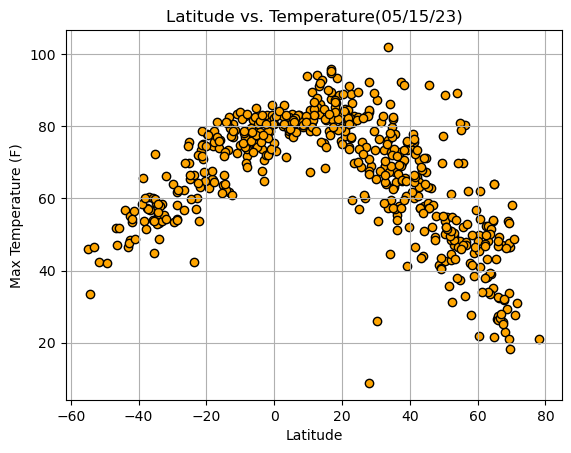

In [8]:
# Next, you'll create a series of scatter plots to showcase the following relationships:
# Latitude vs. Temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolors ="orange", edgecolors ="black")
plt.title("Latitude vs. Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

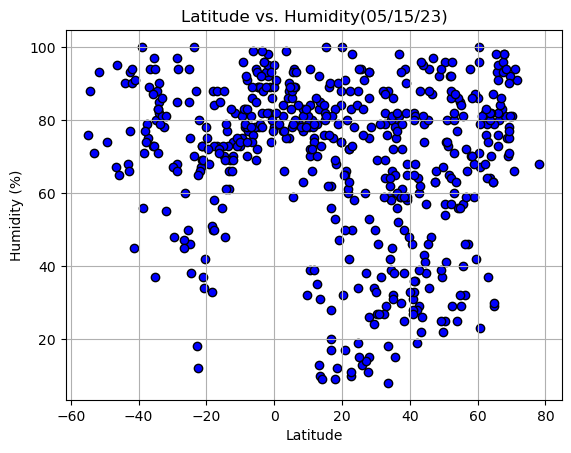

In [9]:
# Latitude vs. Humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolors ="blue", edgecolors ="black")
plt.title("Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

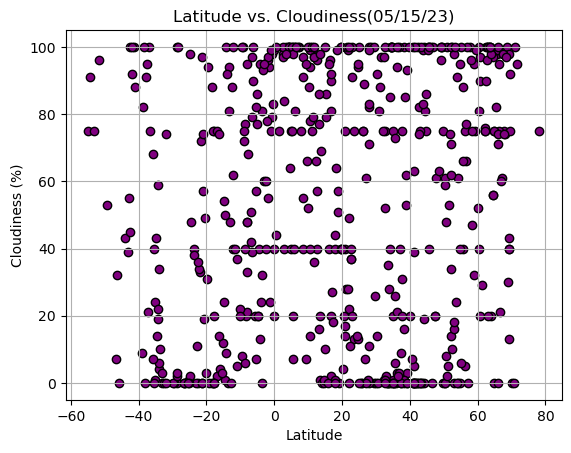

In [10]:
# Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolors ="purple", edgecolors ="black")
plt.title("Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

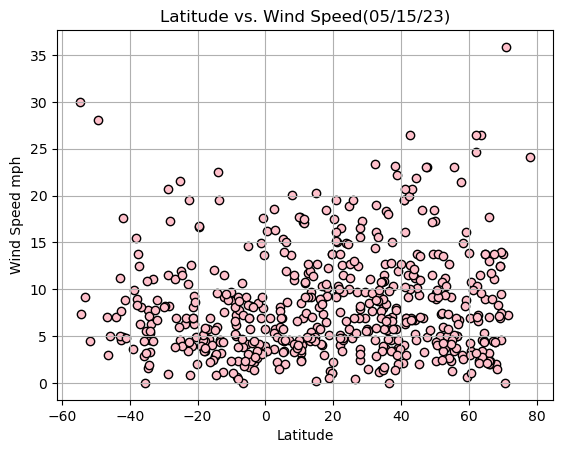

In [11]:
# Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolors ="pink", edgecolors ="black")
plt.title("Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Requirement 2: Compute Linear Regression for Each Relationship</h2>

In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label="", y_label="", title=""):
    sns.regplot(x=x, y=y)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,65.84,19,0,9.22,US,1684188120
4,umm kaddadah,13.6017,26.6876,85.42,10,1,9.69,SD,1684188121
5,thompson,55.7435,-97.8558,69.96,40,40,23.02,CA,1684188108
7,iskateley,67.6803,53.1512,31.87,98,75,4.36,RU,1684188124
9,vadso,70.0744,29.7487,58.08,81,0,13.80,NO,1684188125


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,56.82,90,43,7.00,NZ,1684188119
2,el bolson,-41.9667,-71.5167,53.42,90,92,4.88,AR,1684188050
3,port mathurin,-19.6833,63.4167,77.92,75,31,16.67,MU,1684188121
6,puerto natales,-51.7236,-72.4875,42.48,93,96,4.45,CL,1684188123
8,bandar lampung,-5.4254,105.2580,75.13,94,57,4.14,ID,1684188125


The r-squared is: 0.6313612301790738


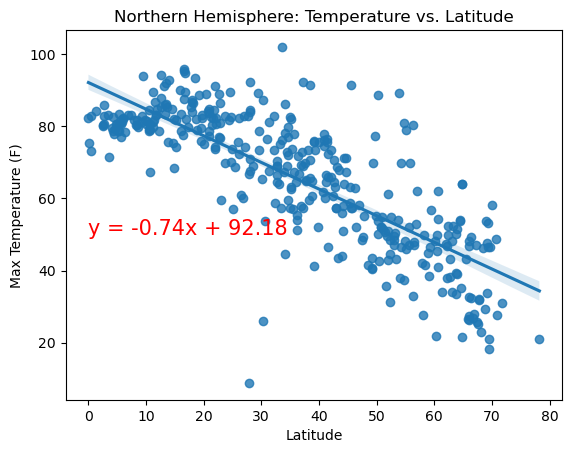

In [32]:
# You should create the following plots:
# Northern Hemisphere: Temperature vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Max Temp", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7280956075806279


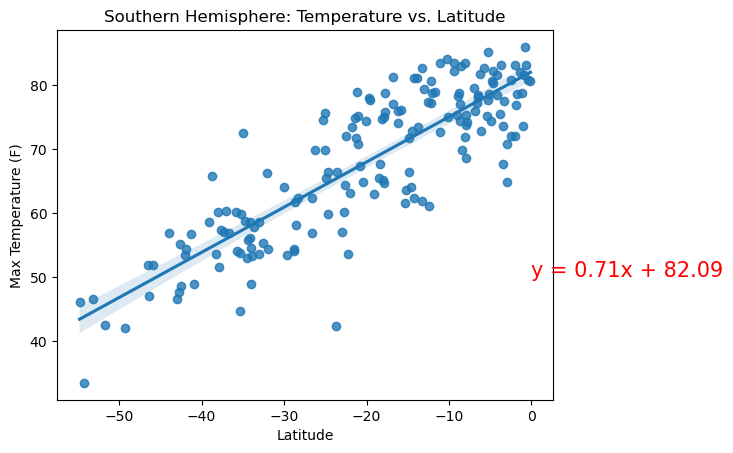

In [33]:
# Southern Hemisphere: Temperature vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Max Temp", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0004284597051098346


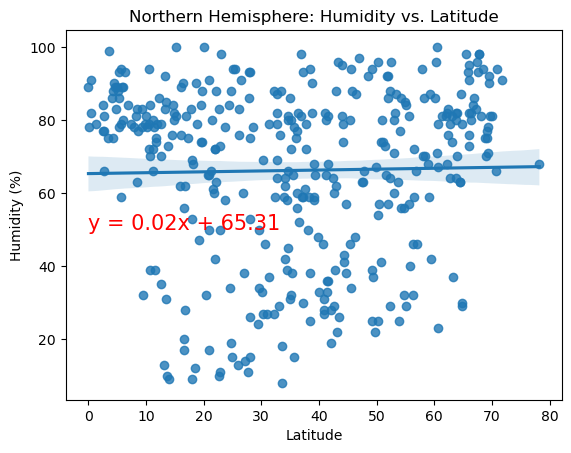

In [31]:
# Northern Hemisphere: Humidity vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Humidity", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.016795741315576738


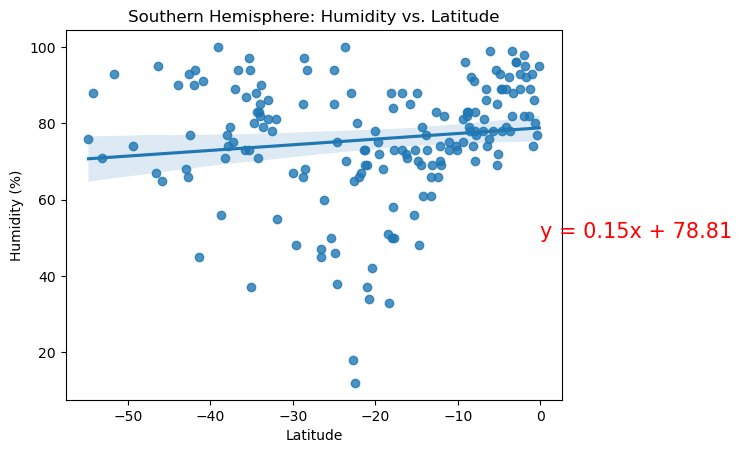

In [34]:
# Southern Hemisphere: Humidity vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Humidity", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 4.5343467269006065e-07


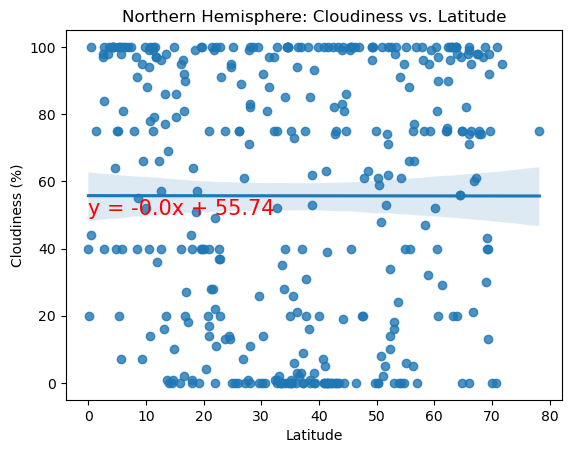

In [35]:
# Northern Hemisphere: Cloudiness vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Cloudiness", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.016812801310072296


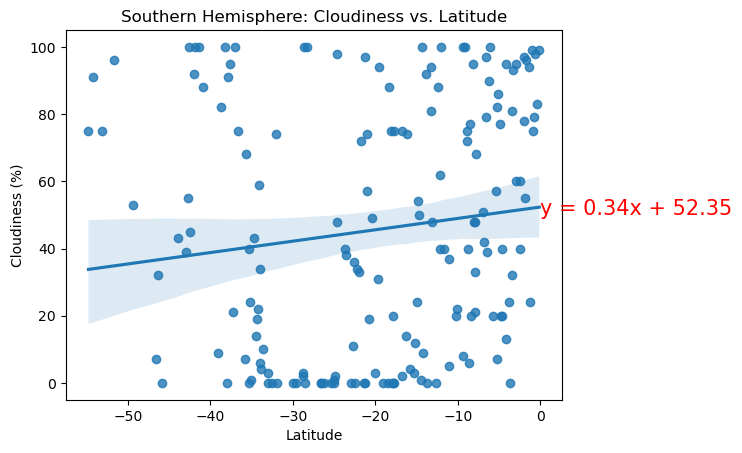

In [36]:
# Southern Hemisphere: Cloudiness vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Cloudiness", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00062732871561688


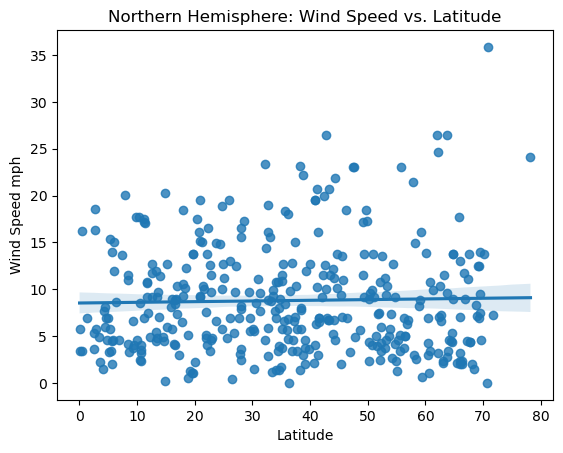

In [37]:
# Northern Hemisphere: Wind Speed vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Wind Speed", (40,60))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04803154158646407


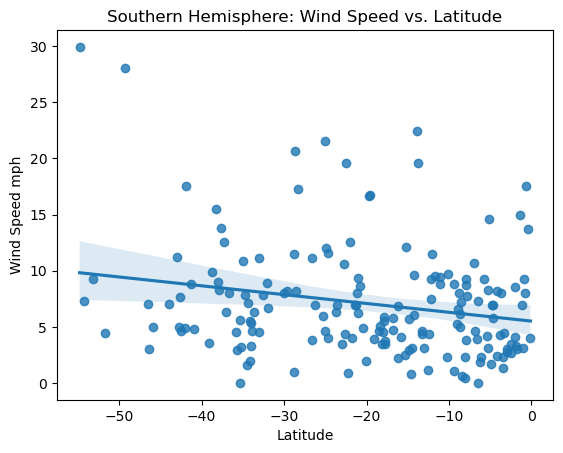

In [40]:
# Southern Hemisphere: Wind Speed vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Wind Speed", (70,80))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2}")
plt.show()